Supplemental Figures for _Uncovering mental structure through data-driven ontology discovery_

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from os import path
import pandas as pd
import pickle
import seaborn as sns
pd.set_option('max_rows', 200)

from dimensional_structure import DA_plots
from dimensional_structure.EFA_plots import plot_heatmap_factors, plot_bar_factors, plot_factor_correlation
from dimensional_structure.HCA_plots import plot_subbranches, plot_results_dendrogram
from dimensional_structure.notebook_utils import plot_factor_df, plot_EFA_robustness, plot_bootstrap_results
from selfregulation.utils.utils import get_recent_dataset
from selfregulation.utils.result_utils import load_results

In [2]:
%matplotlib inline
dataset = get_recent_dataset()
results = load_results(datafile=dataset)

# Exploratory Factor Analysis Results

Below are the loading matrices for the exploratory factor analysis (EFA) solutions for surveys, tasks, and the outcome measures. These matrices are depicted as heatmaps, as well as dataframes with the actual values.

### Survey Exploratory Factor Analysis Loadings

12 factors were determined using a BIC criteria for exploratory factor analysis. The 64 survey DVs are grouped and ordered based on the largest (absolute) factor loading for that DV. **Hover over the cells to see the exact value**

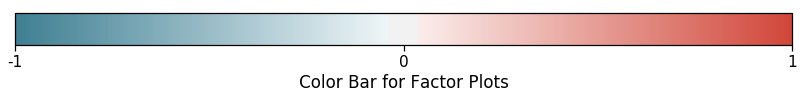

In [3]:
fig = plt.figure(figsize=(12, 3))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])
cmap = sns.diverging_palette(220,15,n=20, as_cmap=True)
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
                                orientation='horizontal')
cb1.set_ticks([0,.5,1])
cb1.set_ticklabels(['-1','0', '1'])
cb1.set_label('Color Bar for Factor Plots')

In [4]:
survey_results = results['survey']
plot_factor_df(survey_results.EFA)

,Reward Sensitivity,Sensation Seeking,Financial Risk-Taking,Social Risk-Taking,Ethical Risk-Taking,Eating Control,Impulsivity,Emotional Control,Mindfulness,Goal-Directedness,Agreeableness,Risk Perception
bis bas survey: BAS fun seeking,0.62,0.27,0.074,0.07,0.01,-0.013,0.086,0.015,-0.047,-0.19,-0.038,-0.031
time perspective survey: present hedonistic,0.59,0.2,0.072,0.022,0.055,0.027,0.31,0.051,0.018,-0.14,0.047,0.053
bis bas survey: BAS drive,0.58,0.0064,0.063,-0.061,0.061,0.039,-0.033,0.14,-0.022,0.38,-0.12,-0.0031
bis bas survey: BAS reward responsiveness,0.57,-0.0034,-0.039,0.048,-0.093,0.086,-0.15,-0.12,-0.034,0.15,0.2,0.063
ten item personality survey: openness,0.47,0.12,0.059,0.26,-0.058,-0.18,-0.091,0.053,0.074,-0.15,-0.079,0.044
ten item personality survey: extraversion,0.32,-0.027,0.041,0.017,0.031,-0.024,0.29,0.24,0.2,0.12,0.062,0.037
erq survey: suppression,-0.3,0.24,-0.012,-0.13,0.075,0.072,-0.25,0.2,-0.27,-0.11,-0.28,0.095
sensation seeking survey: disinhibition,0.26,0.23,0.11,0.16,0.22,0.031,0.0052,-0.075,0.018,-0.071,-0.16,-0.13
five facet mindfulness survey: observe,0.26,-0.026,0.086,0.24,0.027,-0.12,-0.22,-0.19,0.094,0.077,0.14,0.13
sensation seeking survey: thrill adventure seeking,-0.031,0.93,0.019,-0.015,-0.043,0.017,0.033,-0.00062,-0.016,0.055,0.003,-0.037


### Task Exploratory Factor Analysis Loadings

5 factors were determined using a BIC criteria for exploratory factor analysis. The 129 survey DVs are grouped and ordered based on the largest (absolute) factor loading for that DV. Dotted lines indicate separate groups derived from this criteria, and are used for visualization purposes only.

In [5]:
task_results = results['task']
plot_factor_df(task_results.EFA)

,Strategic IP,Speeded IP,Caution,Perc / Resp,Discounting
adaptive n back: mean load: logTr,0.61,0.24,0.063,-0.011,-0.0036
spatial span: forward span,0.56,-0.023,0.0005,-0.089,-0.041
spatial span: reverse span,0.55,0.04,0.067,-0.089,0.015
cognitive reflection survey: correct proportion,0.53,0.092,0.043,0.11,-0.22
tower of london: avg move time: logTr,-0.5,0.16,0.14,0.3,-0.068
ravens: score,0.48,0.35,-0.052,0.059,-0.15
cognitive reflection survey: intuitive proportion,-0.43,-0.055,-0.03,-0.069,0.11
columbia card task cold: information use,0.41,0.21,-0.025,-0.026,-0.12
adaptive n back: DDM-drift load,0.39,-0.11,0.13,0.023,-0.022
columbia card task hot: information use,0.39,0.14,-0.0088,-0.069,-0.026


### Outcome Exploratory Factor Analysis Loadings

9 factors were determined using a BIC criteria for exploratory factor analysis. The 55 target measures are grouped and ordered based on the largest (absolute) factor loading for that target measure. Dotted lines indicate separate groups derived from this criteria, and are used for visualization purposes only.

In [6]:
plot_factor_df(task_results.DA)

,Binge Drinking,Problem Drinking,Lifetime Smoking,Daily Smoking,Drug Use,Mental Health,Obesity,Income / Life Milestones
AlcoholHowOften6Drinks,0.87,0.064,0.028,0.039,0.011,0.022,0.024,-0.012
AlcoholHowOften,0.62,0.057,-0.016,0.051,0.038,-0.029,-0.084,0.23
AlcoholHowManyDrinksDay,0.6,0.13,0.14,0.004,-0.036,0.003,0.091,-0.12
DivorceCount,-0.17,0.042,0.1,-0.0016,-0.031,0.0098,-0.031,-0.09
HowOftenDrinkMorning,-0.16,0.85,0.0015,0.034,0.049,0.014,0.023,0.047
HowOftenFailedActivitiesDrinking,-0.0026,0.84,0.049,-0.038,-0.035,-0.025,-0.032,-0.011
HowOftenCantStopDrinking,0.14,0.79,0.0021,0.014,-0.028,0.0033,-0.0054,0.0053
HowOftenGuiltRemorseDrinking,0.19,0.7,-0.09,0.046,0.031,0.02,0.0011,-0.056
HowOftenUnableRememberDrinking,0.24,0.55,0.0015,-0.047,0.025,-0.0046,-0.028,-0.073
RelativeFriendConcernedDrinking,0.13,0.34,0.19,-0.019,0.29,0.086,0.047,0.062


## Factor Robustness Analyses

Factor robustness proceeded in two ways:

**(1)** By dropping one measure at a time, recalculating the survey factor solution (with the same number of factors as the full sample) and correlating the new factor loadings with the original factor loadings. This correlation is calculated on all DVs excepting those dropped out because of the dropped measure. Tables for these correlations are shown with values below .9 highlighted in red

**(2)** By using a bootstrap procedure (see fa.sapa), which creates confidence intervals for each loading. 95% confidence intervals are plotted as bar plots for each loading

### Survey Robustness

#### Measurement Drop

Individual surveys sometimes had large effects on the factor structure, likely because of spare measurement of highly discriminat psychological constructs. All dimensions that are affected by a measure drop out (correlation pre-post drop out of factor loadings < .9) is highlighted. Worse deviation are colored darker.

In [7]:
f = path.join(results['survey'].get_output_dir(), 'EFAdrop_robustness.pkl')
survey_EFA_robustness = pickle.load(open(f, 'rb'))
plot_EFA_robustness(survey_EFA_robustness)

,Agreeableness,Eating Control,Emotional Control,Ethical Risk-Taking,Financial Risk-Taking,Goal-Directedness,Impulsivity,Mindfulness,Reward Sensitivity,Risk Perception,Sensation Seeking,Social Risk-Taking
bis11 survey,0.989,0.999,0.996,0.999,0.999,0.996,0.999,0.998,0.997,1,1,0.999
bis bas survey,0.909,0.988,0.993,0.995,0.999,0.988,0.973,0.996,0.935,0.995,0.999,0.987
brief self control survey,0.999,1,1,1,1,0.999,1,1,1,1,1,1
dickman survey,0.997,1,1,0.999,1,0.999,1,1,1,1,1,1
dospert eb survey,0.914,0.982,0.98,0.496,0.448,0.843,0.977,0.995,0.873,0.947,0.992,0.843
dospert rp survey,0.965,0.983,0.983,0.918,0.468,0.847,0.974,0.997,0.841,0.496,0.989,0.968
dospert rt survey,0.947,0.986,0.976,0.907,0.516,0.877,0.974,0.997,0.872,0.983,0.991,0.816
eating survey,0.966,0.524,0.996,0.997,0.992,0.862,0.992,0.995,0.814,0.998,0.998,0.976
erq survey,0.991,0.999,0.997,0.998,0.999,0.998,0.997,0.998,0.994,0.999,0.999,0.999
five facet mindfulness survey,0.974,0.992,0.988,0.996,0.993,0.855,0.985,0.798,0.996,0.998,0.997,0.992


#### Bootstrap

It's clear that loadings are robust to the particulars of the sample. The standard deviation of the loadings are very small relative to the mean loadings.

# of components not specified, using BIC determined #


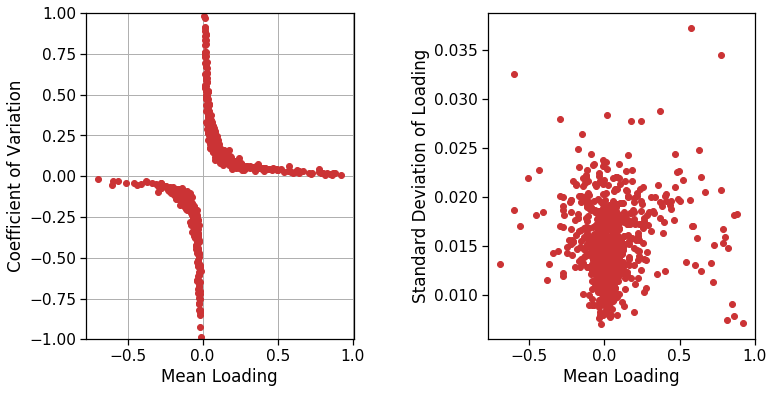

In [12]:
plot_bootstrap_results(survey_results.EFA.get_boot_stats())

### Task Robustness

#### Measurement Drop

Task factors are more robust to dropping out particular measures, likely due to the greater overlap in the psychological constructs measured by individual tasks

In [13]:
f = path.join(results['task'].get_output_dir(), 'EFAdrop_robustness.pkl')
task_EFA_robustness = pickle.load(open(f, 'rb'))
plot_EFA_robustness(task_EFA_robustness)

,Caution,Discounting,Perc / Resp,Speeded IP,Strategic IP
adaptive n back,0.998,1,1,0.998,0.995
angling risk task always sunny,1,1,1,1,1
attention network task,0.996,1,0.999,1,0.999
bickel titrator,1,0.997,1,0.999,1
choice reaction time,0.999,1,0.999,0.999,0.998
cognitive reflection survey,1,0.999,0.999,0.999,0.997
columbia card task cold,1,1,1,0.999,0.998
columbia card task hot,1,1,1,0.999,0.996
dietary decision,1,1,1,1,1
digit span,1,1,1,1,0.999


#### Bootstrap

It's clear that loadings are robust to the particulars of the sample. The standard deviation of the loadings are very small relative to the mean loadings.

# of components not specified, using BIC determined #


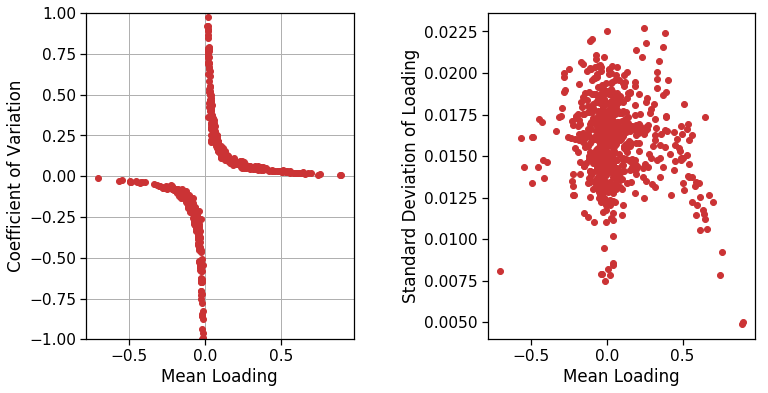

In [14]:
plot_bootstrap_results(task_results.EFA.get_boot_stats())

# Hierarchical Clustering

Hierarchical clustering was used to order dependent variables based on the similarity of their loading vectors. This resulted in a dendrogram, which was subset into clusters using the DynamicTreeCut algorithm. These clusters are separately plotted below, allowing the constituent DVs to be read.

### Survey Clusters

Below is the survey dendrogram (reproduced from the main manuscript). Following are the 12 clusters. separately plotted. The fourth and fifth clusters, referenced in the main text, together reflect canonical components of "self-control".

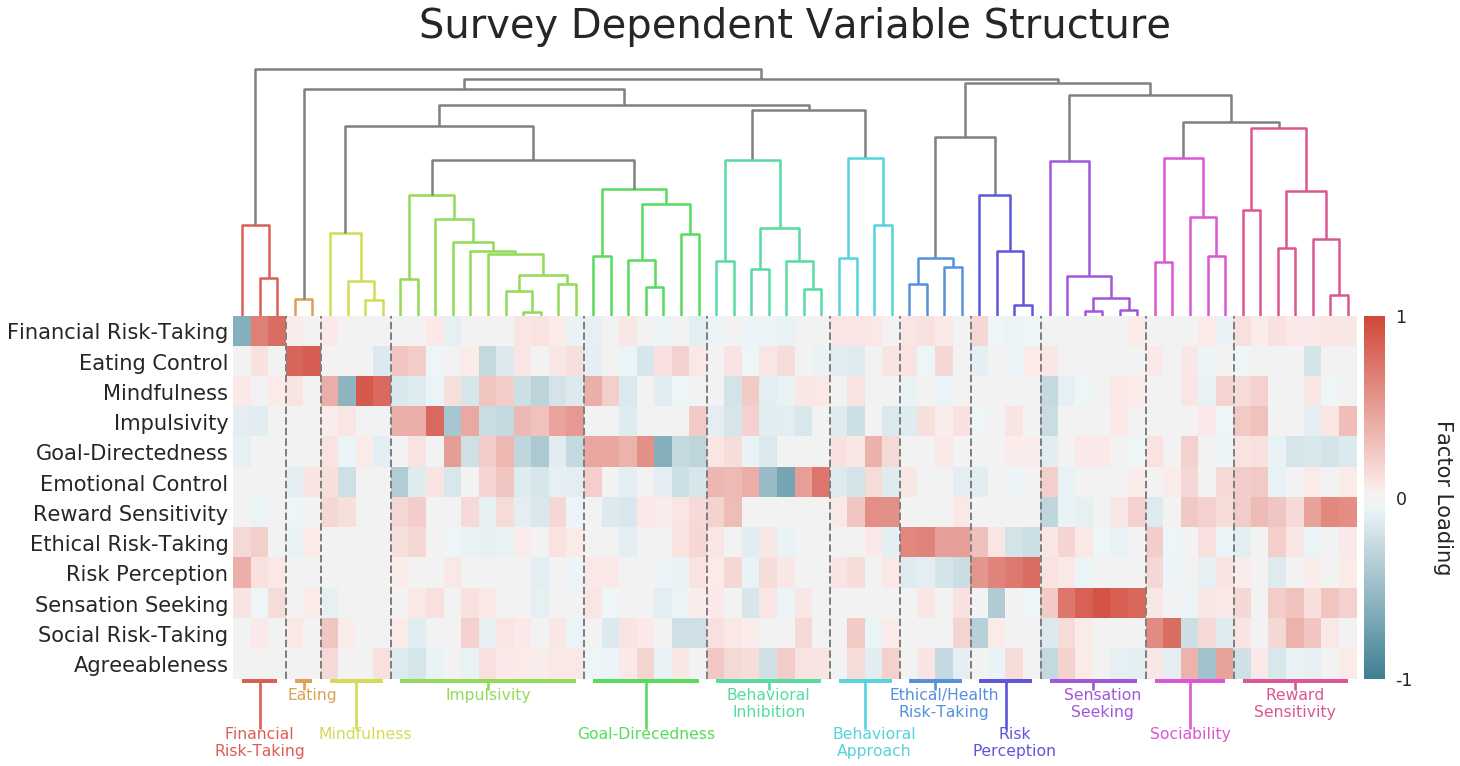

In [15]:
_ = plot_results_dendrogram(survey_results, size=20, drop_list=[0,2,4,6,8,10])

# of components not specified, using BIC determined #


[<Figure size 432x864 with 5 Axes>,
 <Figure size 432x864 with 5 Axes>,
 <Figure size 432x864 with 5 Axes>,
 <Figure size 432x864 with 5 Axes>,
 <Figure size 432x864 with 5 Axes>,
 <Figure size 432x864 with 5 Axes>,
 <Figure size 432x864 with 5 Axes>,
 <Figure size 432x864 with 5 Axes>,
 <Figure size 432x864 with 5 Axes>,
 <Figure size 432x864 with 5 Axes>,
 <Figure size 432x864 with 5 Axes>,
 <Figure size 432x864 with 5 Axes>]

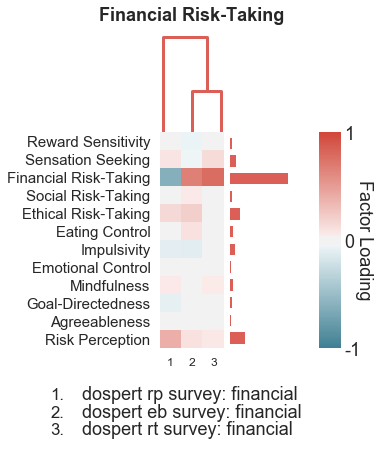

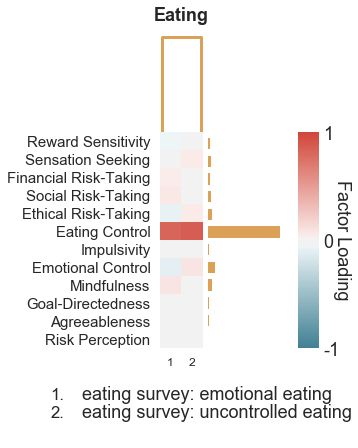

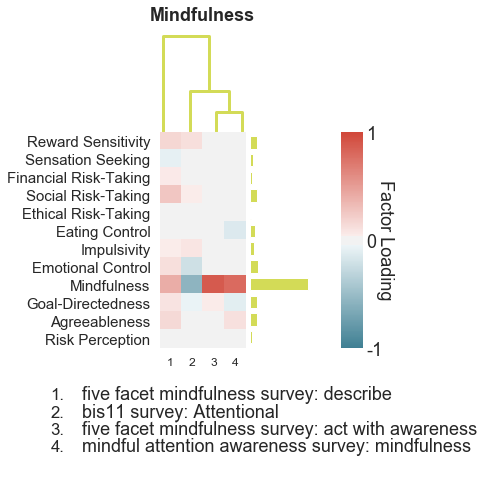

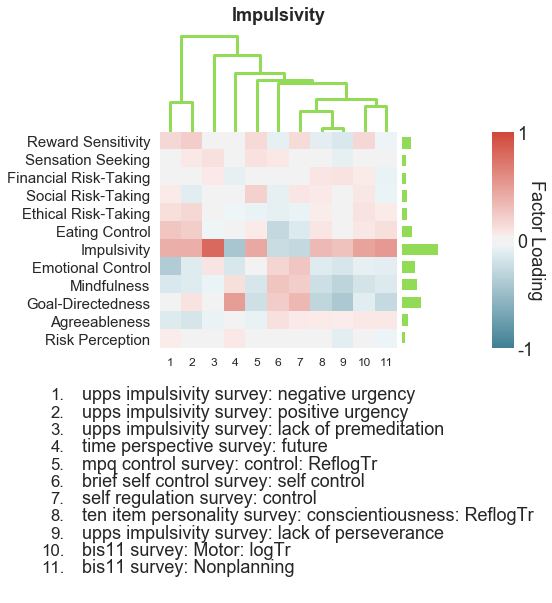

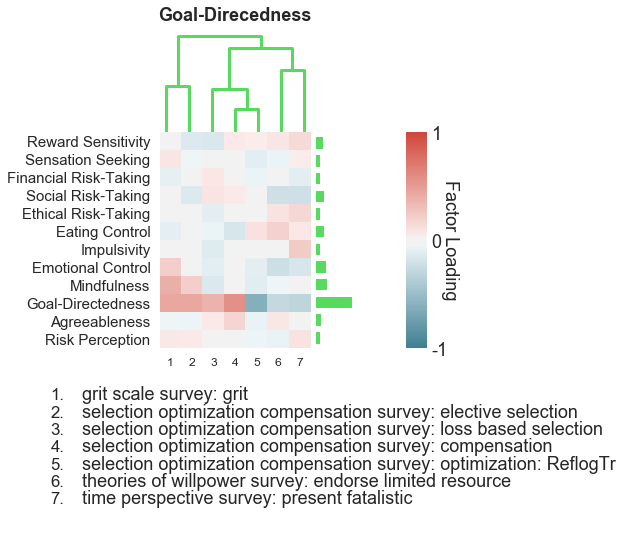

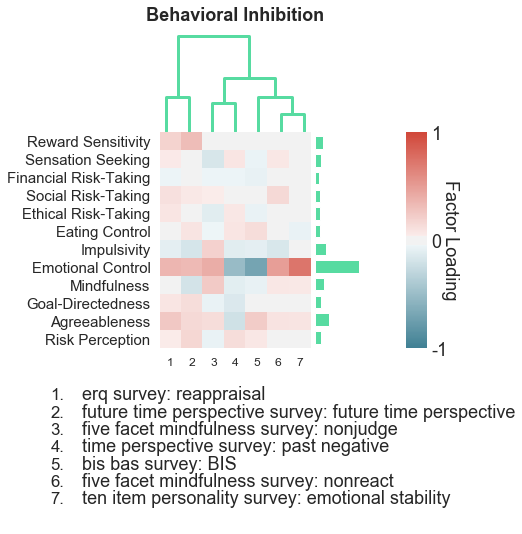

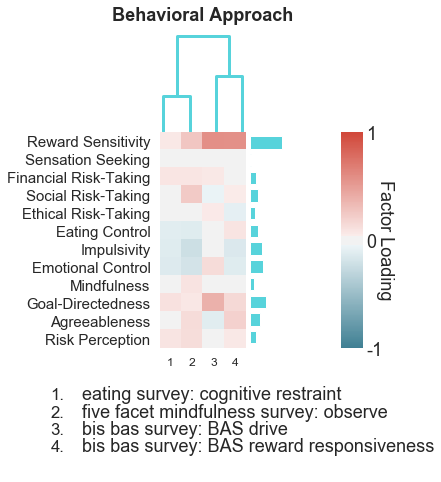

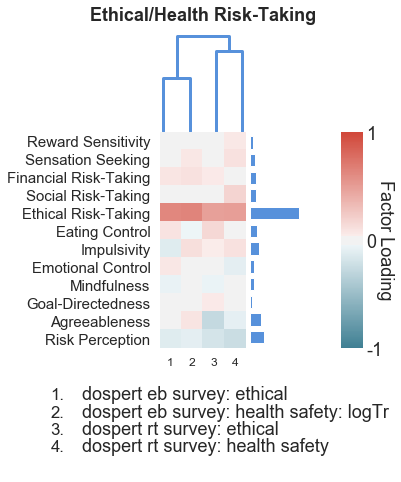

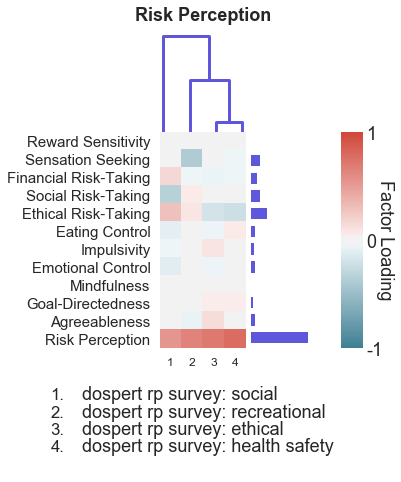

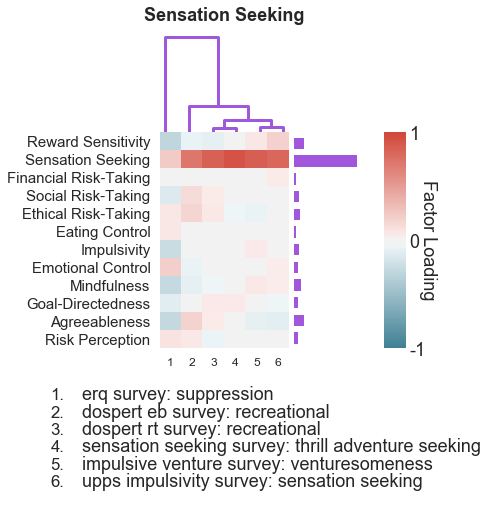

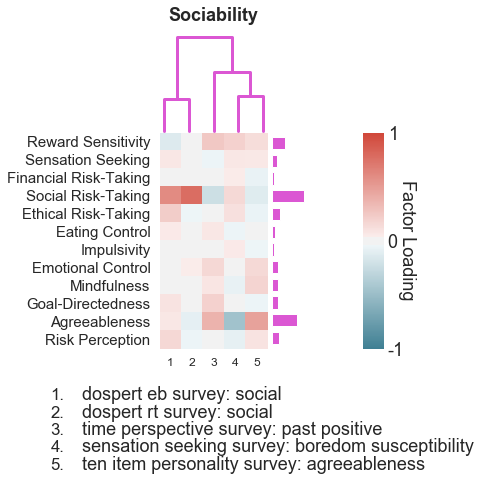

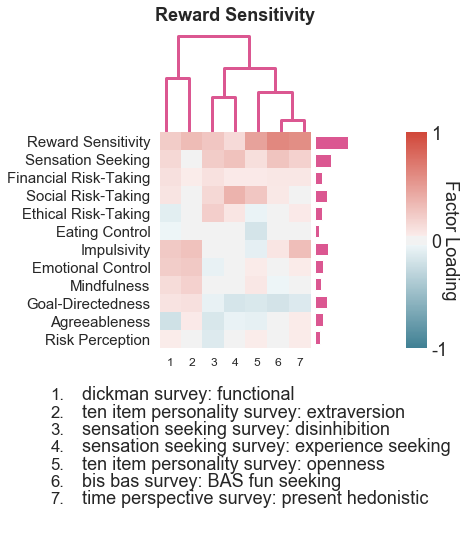

In [16]:
plot_subbranches(survey_results, size=6)

### Task Clusters

Below is the task dendrogram (reproduced from the main manuscript). Following are the 15 of the 16 clusers separately plotted. One cluster composed of a single DV (towards the center of the dendrogram) is not plotted. The single DV is the "Positive Learning Bias" from the "Probabilistic Selection Task"

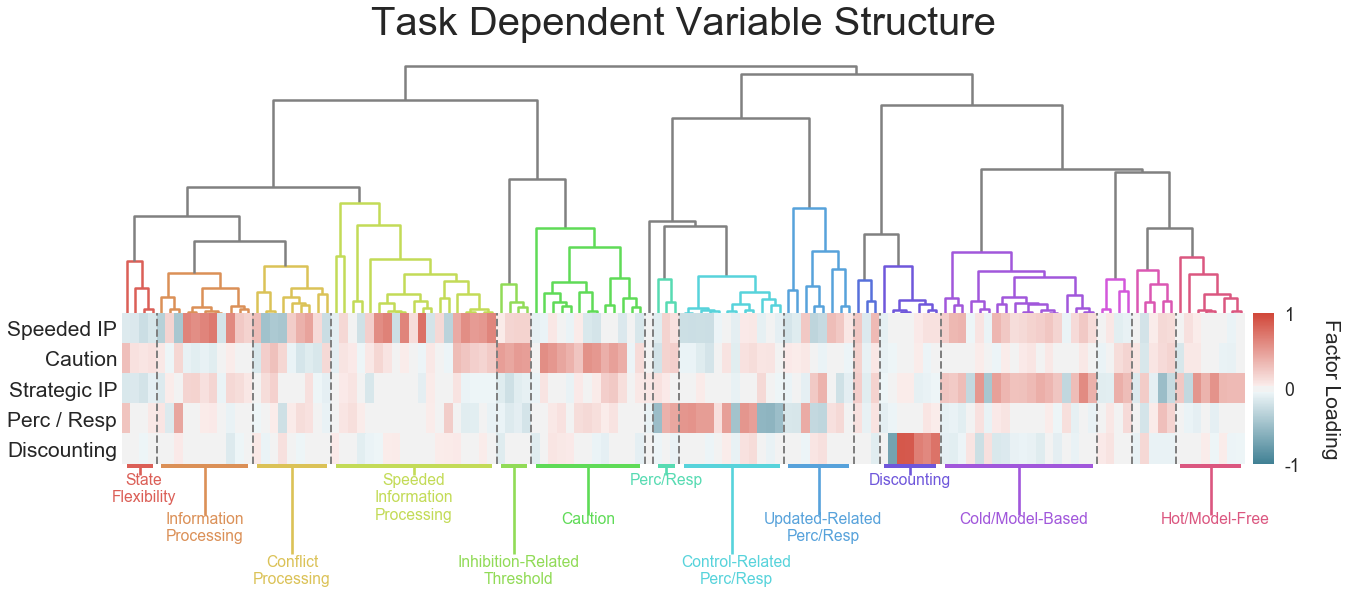

In [17]:
_ = plot_results_dendrogram(task_results, size=20, drop_list=[1,5,9,12,15], double_drop_list=[2,4,6,8,14])

# of components not specified, using BIC determined #


[<Figure size 432x864 with 5 Axes>,
 <Figure size 432x864 with 5 Axes>,
 <Figure size 432x864 with 5 Axes>,
 <Figure size 432x864 with 5 Axes>,
 <Figure size 432x864 with 5 Axes>,
 <Figure size 432x864 with 5 Axes>,
 <Figure size 432x864 with 5 Axes>,
 <Figure size 432x864 with 5 Axes>,
 <Figure size 432x864 with 5 Axes>,
 <Figure size 432x864 with 5 Axes>,
 <Figure size 432x864 with 5 Axes>,
 <Figure size 432x864 with 5 Axes>,
 <Figure size 432x864 with 5 Axes>,
 <Figure size 432x864 with 5 Axes>,
 <Figure size 432x864 with 5 Axes>]

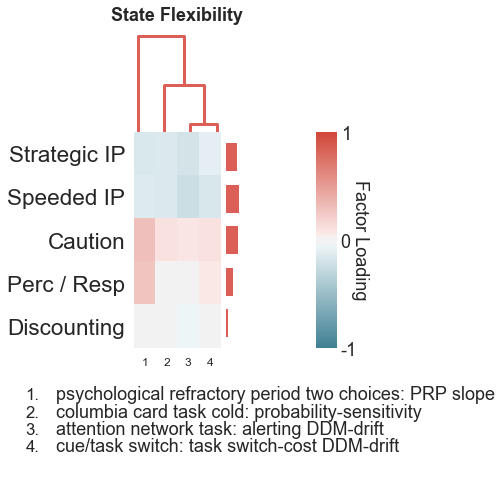

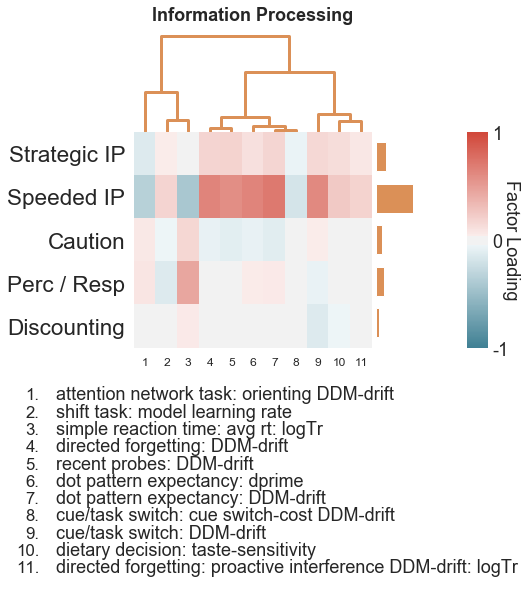

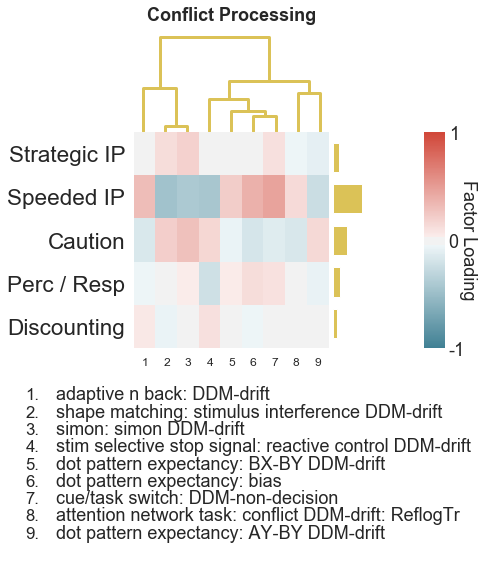

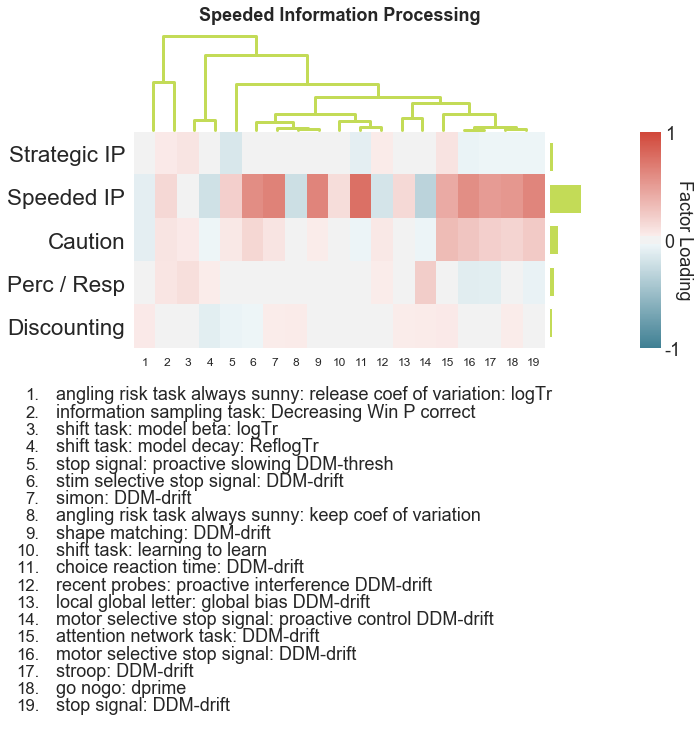

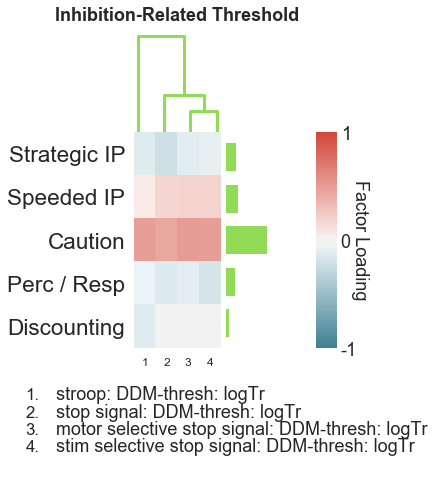

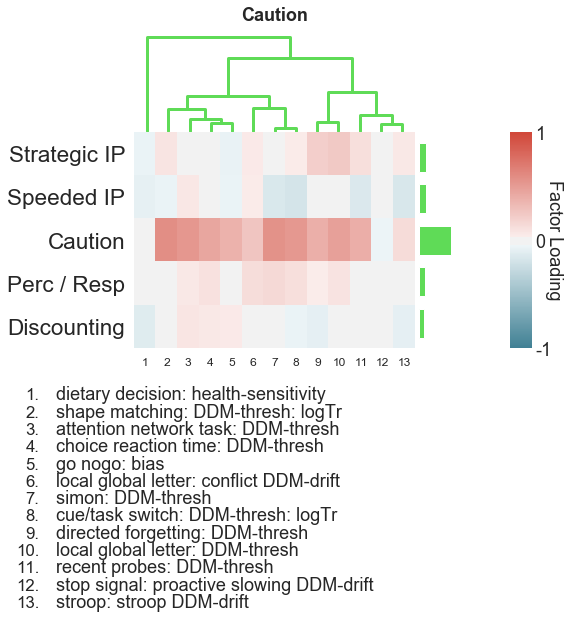

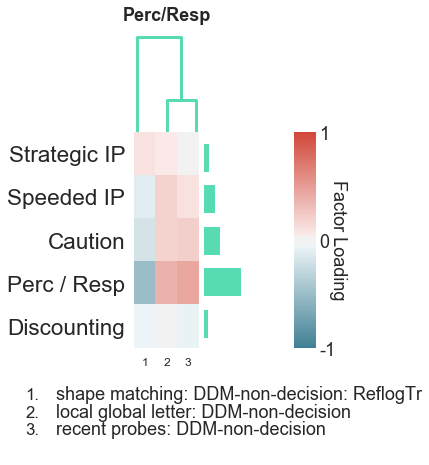

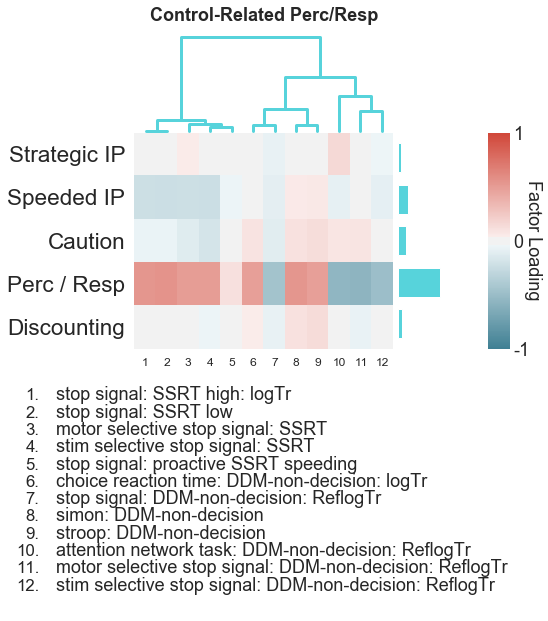

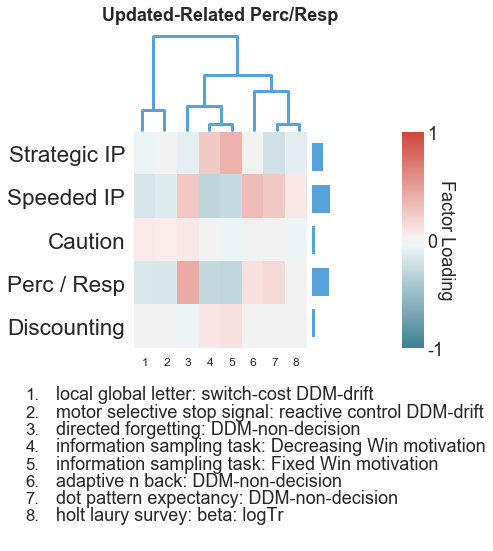

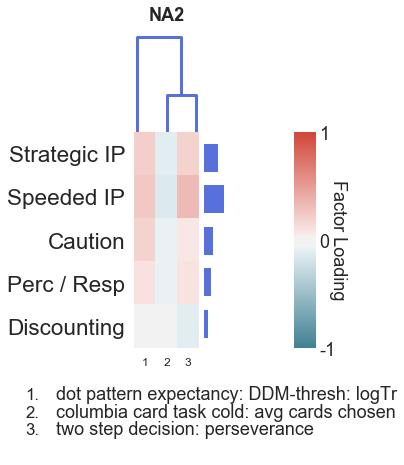

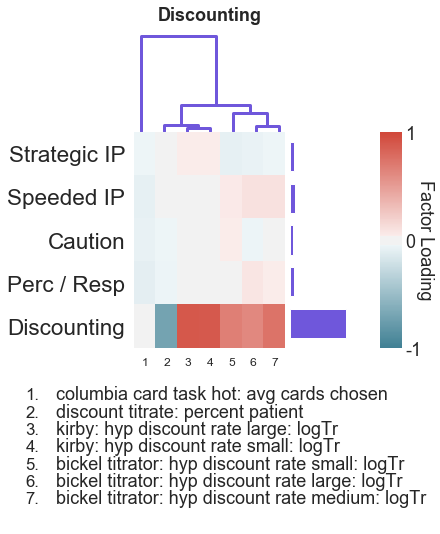

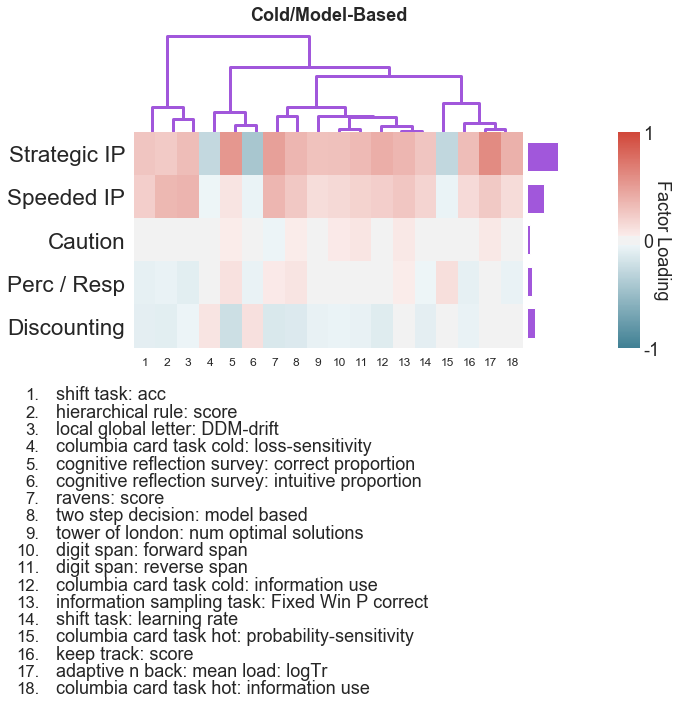

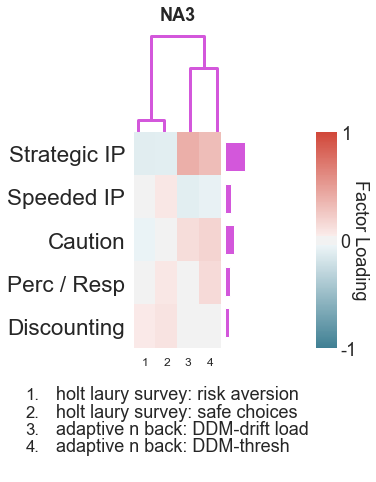

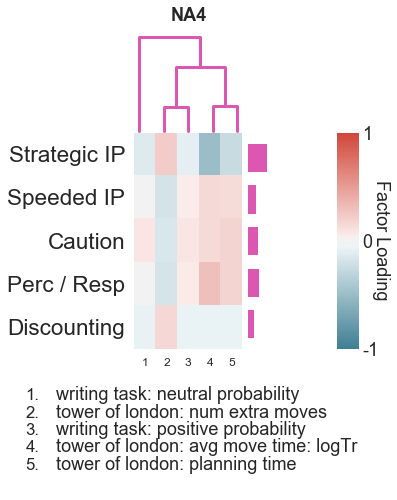

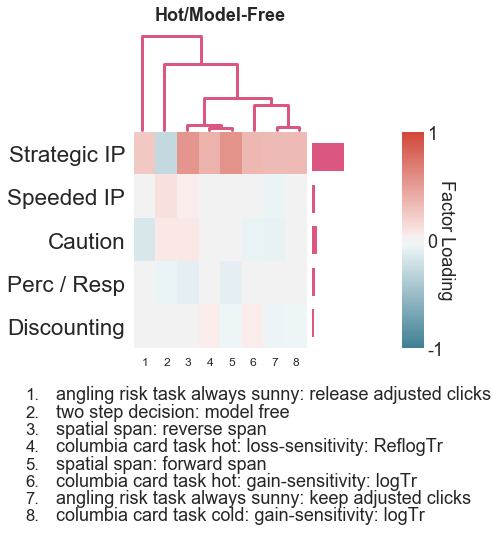

In [18]:
plot_subbranches(task_results, size=6)

## Cluster Robustness Analyses

### Survey Cluster Robustness

### Task Cluster Robustness

In [19]:
f = path.join(results['task'].get_output_dir(), 'cluster_robustness.pkl')
task_cluster_robustness = pickle.load(open(f, 'rb'))

AttributeError: Can't get attribute 'ConsensusCluster' on <module '__main__'>